# Loan Approval Prediction

**Dataset Overview**

[Dataset Link](https://www.kaggle.com/datasets/anishdevedward/loan-approval-dataset)

This dataset simulates loan applications and their approval outcomes for 2,000 individuals. It includes a range of demographic, financial, and employment-related attributes such as age, income, credit score, loan amount, employment status, and existing debts.
The dataset aims to model credit risk and loan approval prediction, providing an excellent opportunity to practice binary classification, data preprocessing, and feature engineering in the financial domain.


**Objective:**

Build a machine learning model that predicts whether a loan application will be approved or rejected based on applicant attributes.

**Applications:**

* Credit risk modeling

* Loan approval prediction

* Customer profiling

* Model interpretability and fairness analysis

### Project Workflow
1. Import Libraries & Load Dataset

2. Exploratory Data Analysis (EDA) & Feature Engineering

3. Data Preprocessing

4. Model Building

5. Hyperparameter Tuning (if necessary)

6. Model Evaluation

7. Model Export

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anishdevedward/loan-approval-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'loan-approval-dataset' dataset.
Path to dataset files: /kaggle/input/loan-approval-dataset


# Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
data = pd.read_csv(os.path.join(path, "loan_approval.csv"))

In [4]:
data.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


# EDA

In [5]:
data.shape

(2000, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [7]:
data.describe()

,income,credit_score,loan_amount,years_employed,points
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,90585.977000,573.946000,25308.503000,20.441000,56.680000
std,34487.874907,160.564945,14207.320147,11.777813,18.638033
min,30053.000000,300.000000,1022.000000,0.000000,10.000000
25%,61296.250000,433.000000,12748.750000,10.000000,45.000000
50%,90387.500000,576.000000,25661.500000,21.000000,55.000000
75%,120099.750000,715.000000,37380.500000,31.000000,70.000000
max,149964.000000,850.000000,49999.000000,40.000000,100.000000


In [8]:
data.isnull().sum()

,0
name,0
city,0
income,0
credit_score,0
loan_amount,0
years_employed,0
points,0
loan_approved,0


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.describe(include='object')

,name,city
count,2000,2000
unique,2000,1882
top,Nicholas Cunningham,North Joseph
freq,1,4


In [11]:
data.drop(['name', 'city'], axis=1, inplace=True)

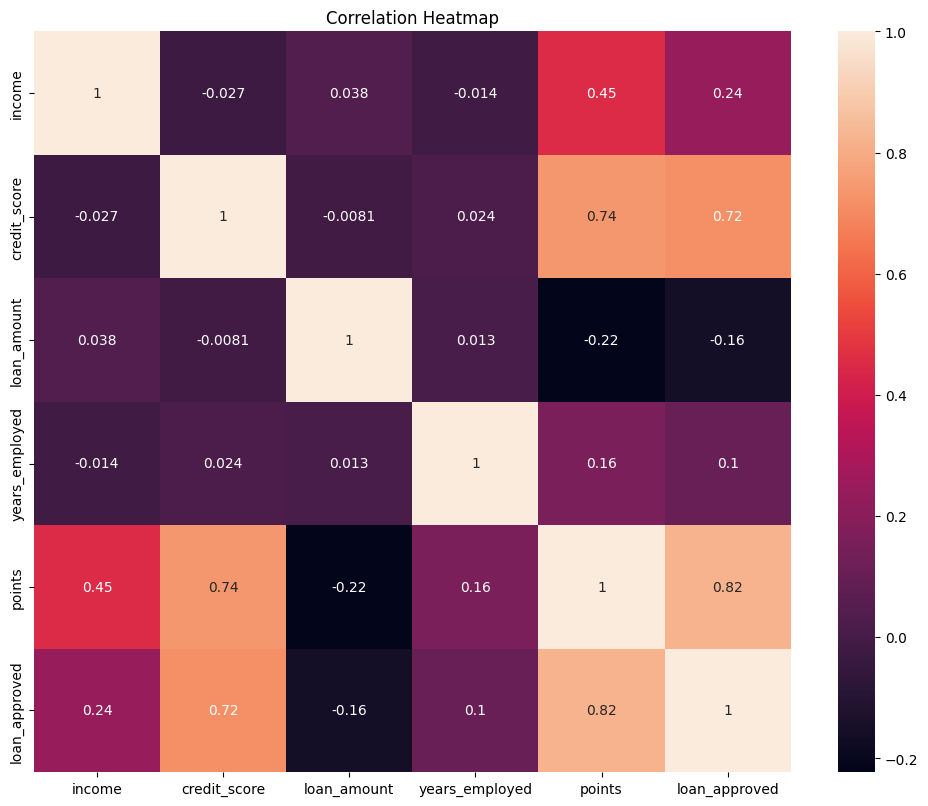

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.tight_layout()
plt.title("Correlation Heatmap")
plt.show()

Conclusions:
- points and credit_score are highly correlated with loan approval
- loan_amount shows some amount of negative correlation with loan approval


Feature Engineering:
- (loan_amount/income) * 100 -> income_loan_ratio

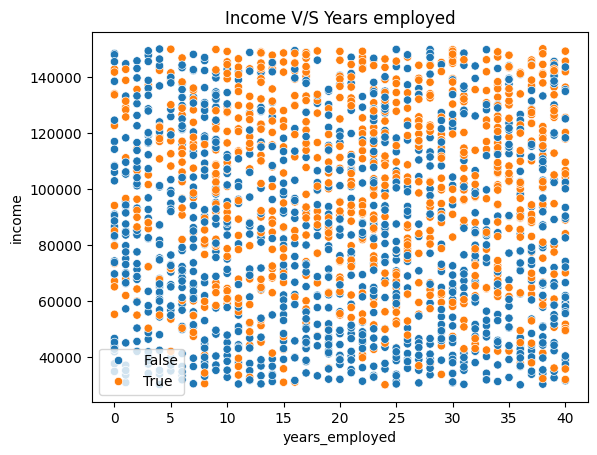

In [13]:
sns.scatterplot(x=data['years_employed'], y=data['income'], hue=data['loan_approved'])
plt.legend()
plt.title("Income V/S Years employed")
plt.show()

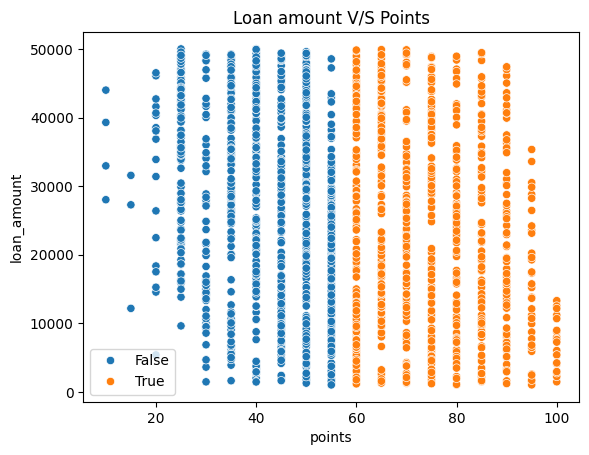

In [14]:
sns.scatterplot(x=data['points'], y=data['loan_amount'], hue=data['loan_approved'])
plt.legend()
plt.title("Loan amount V/S Points")
plt.show()

Observation:
- People with points ~ >=60 are granted the loan

Conclusion:

We will be dropping the points feature as our model would completely depend on the single column and it would be equivalent of doing something like below:

```python
if data['points'] > 60:
  print("loan_approval = True")
```

## Feature Engineering

In [43]:
data.drop("points", axis=1, inplace=True)

In [15]:
data['income_loan_pct'] = round((data['loan_amount']/data['income']) * 100, 2)
data.head()

,income,credit_score,loan_amount,years_employed,points,loan_approved,income_loan_pct
0,113810,389,39698,27,50.0,False,34.88
1,44592,729,15446,28,55.0,False,34.64
2,33278,584,11189,13,45.0,False,33.62
3,127196,344,48823,29,50.0,False,38.38
4,66048,496,47174,4,25.0,False,71.42


Significance:

income_loan_pct -> loan amount is x% of individuals income

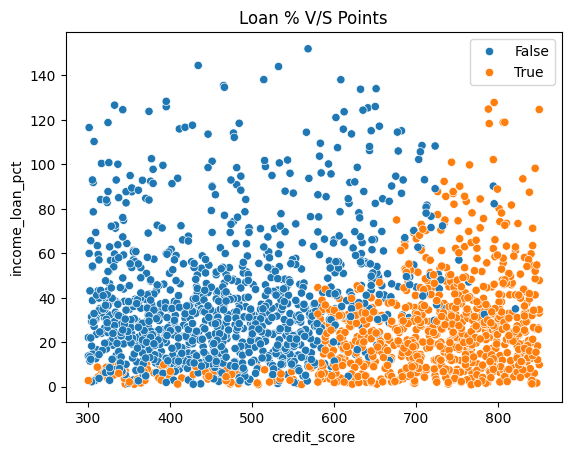

In [16]:
sns.scatterplot(x=data['credit_score'], y=data['income_loan_pct'], hue=data['loan_approved'])
plt.legend()
plt.title("Loan % V/S Points")
plt.show()

In [17]:
data.drop(['loan_amount','income'], axis=1, inplace=True)

In [44]:
data.corrwith(data['loan_approved'])

,0
credit_score,0.715788
years_employed,0.104408
loan_approved,1.000000
income_loan_pct,-0.249377


# Data Preprocessing

In [19]:
data['loan_approved'].value_counts()

,count
loan_approved,
False,1121
True,879


Observation:

Imbalancement is seen: SMOTE will be used in train set to avoid data leakage

In [20]:
data.isnull().sum()

,0
credit_score,0
years_employed,0
points,0
loan_approved,0
income_loan_pct,0


In [21]:
data.shape

(2000, 5)

In [45]:
data.head()

,credit_score,years_employed,loan_approved,income_loan_pct
0,389,27,0.0,34.88
1,729,28,0.0,34.64
2,584,13,0.0,33.62
3,344,29,0.0,38.38
4,496,4,0.0,71.42


In [46]:
data.duplicated().sum()

np.int64(0)

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['loan_approved'] = le.fit_transform(data['loan_approved'])

In [84]:
data.head()

,credit_score,years_employed,loan_approved,income_loan_pct
0,389,27,0,34.88
1,729,28,0,34.64
2,584,13,0,33.62
3,344,29,0,38.38
4,496,4,0,71.42


In [49]:
data['loan_approved'].value_counts()

,count
loan_approved,
0.0,1121
1.0,879


In [50]:
X = data.drop('loan_approved', axis=1)
y = data['loan_approved']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Splitting data into training and testing set

In [52]:
print(X_train.shape)
print(y_train.shape)

(1600, 3)
(1600,)


In [53]:
# Applying SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [54]:
X_train_resampled.shape

(1808, 3)

In [55]:
pd.Series(y_train_resampled.value_counts())

,count
loan_approved,
0.0,904
1.0,904


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)


# Model Building

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=300, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

for model in models:
  trained_mdl = models[model].fit(X_train_resampled, y_train_resampled)
  y_pred_train = trained_mdl.predict(scaler.transform(X_train))
  y_pred_test = trained_mdl.predict(X_test)

  print("####", model, "####")
  print("Train accuracy: ", accuracy_score(y_train, y_pred_train))
  print("Test accuracy: ", accuracy_score(y_test, y_pred_test))
  print("ROC AUC:", roc_auc_score(y_test, y_pred_test))
  print("Precision:", precision_score(y_test, y_pred_test))
  print("Recall:", recall_score(y_test, y_pred_test))
  print("F1-score:", f1_score(y_test, y_pred_test))
  print("Classification Report")
  print(classification_report(y_test, y_pred_test), end="\n\n")



#### Logistic Regression ####
Train accuracy:  0.895
Test accuracy:  0.8575
ROC AUC: 0.8583893631487496
Precision: 0.828125
Recall: 0.8688524590163934
F1-score: 0.848
Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       217
         1.0       0.83      0.87      0.85       183

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400


#### Decision Tree ####
Train accuracy:  1.0
Test accuracy:  0.875
ROC AUC: 0.8732341164916522
Precision: 0.8715083798882681
Recall: 0.8524590163934426
F1-score: 0.861878453038674
Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89       217
         1.0       0.87      0.85      0.86       183

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted 

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:36:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Hyperparameter Tuning

In [63]:
# Dictionary of simple, optimized parameters
params = {
    "Logistic Regression": {
        "C": [0.1, 1.0, 10],
        "solver": ["liblinear"],
        "max_iter": [300, 500, 1000]
    },

    "Decision Tree": {
        "criterion": ["gini", "entropy", "log_loss"],
        "max_depth": [3, 5, 10],
        "min_samples_split": [2, 5, 10]
    },

    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [5, 10, None],
        "min_samples_split": [2, 5, 10]
    },

    "Gradient Boosting": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7]
    },

    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf", "poly"],
        "gamma": ["scale", "auto", 0.1]
    },

    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"],
        "p": [1, 2, 3]  # 1=Manhattan, 2=Euclidean, 3=Minkowski
    },

    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7]
    }
}
from sklearn.model_selection import GridSearchCV

model_accuracies = {}

for model in models:
  grid = GridSearchCV(models[model],
                    param_grid=params[model],
                    cv=3, scoring='accuracy', n_jobs=-1)
  grid.fit(X_train_resampled, y_train_resampled)
  model_accuracy = accuracy_score(y_test, grid.predict(X_test))

  model_accuracies[model] = model_accuracy

print(model_accuracies)





{'Logistic Regression': (0.865,), 'Decision Tree': (0.9175,), 'Random Forest': (0.92,), 'Gradient Boosting': (0.915,), 'Support Vector Machine': (0.9075,), 'K-Nearest Neighbors': (0.9075,), 'XGBoost': (0.915,)}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:11:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [74]:
sorted_model_accuracies = sorted(model_accuracies.items(), key=lambda item: item[1], reverse=True)
best_model = sorted_model_accuracies[0][0]

In [76]:
best_model_instance = models[best_model]

grid = GridSearchCV(models[best_model],
                    param_grid=params[best_model],
                    cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_resampled, y_train_resampled)

best_model_instance.set_params(**grid.best_params_)

best_model_instance.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=300,
                       random_state=42)

In [86]:
y_pred_train = best_model_instance.predict(scaler.transform(X_train))
y_pred_test = best_model_instance.predict(X_test)

print("####", best_model, "####")
print("Train accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test accuracy: ", accuracy_score(y_test, y_pred_test))
print("ROC AUC:", roc_auc_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1-score:", f1_score(y_test, y_pred_test))
print("Classification Report")
print(classification_report(y_test, y_pred_test), end="\n\n")

#### Random Forest ####
Train accuracy:  0.94375
Test accuracy:  0.92
ROC AUC: 0.9236987232756666
Precision: 0.8719211822660099
Recall: 0.9672131147540983
F1-score: 0.917098445595855
Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92       217
         1.0       0.87      0.97      0.92       183

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400




# Model Exporting

In [87]:
import pickle
with open('model.pkl', 'wb') as fp:
  pickle.dump(best_model_instance, fp)
with open('encoder.pkl', 'wb') as fp:
  pickle.dump(le, fp)
with open('scaler.pkl', 'wb') as fp:
  pickle.dump(scaler, fp)


5